# Market Basket Analysis

### **Topic**:
Market Basket Analysis with Machine Learning


### **Motivation**:
The purpose of choosing this project is listed below:
The selected topic fulfills the need to analyze sales trends and determine what items are frequently bought together. Once the dataset has been adequately explored, and the model is built, we can use the data to reduce the complexity of product management and increase the sales of grocery stores in the process.


## 1.Load Dataset

**Source**: https://www.kaggle.com/datasets/puneetbhaya/online-retail

**Description**: This Online Retail data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 2010 and 2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

**Attribute Information**:

> **InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

> **StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

> **Description**: Product (item) name. Nominal.

> **Quantity**: The quantities of each product (item) per transaction. Numeric.

> **InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.

> **UnitPrice**: Unit price. Numeric. Product price per unit in sterling (Â£).

> **CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

> **Country**: Country name. Nominal. The name of the country where a customer resides.

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
# drive.mount('/content/drive/',force_remount=True)
drive.mount('/drive/', force_remount=True)

# dataset=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/Project/online_retail.xlsx')
dataset=pd.read_excel('/drive/My Drive/Lambton/T2/CBD-3335 Data mining/Assignment_2/dataset/Online Retail.xlsx')

Mounted at /drive/


In [ ]:
display(dataset.head(10))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
dataset['InvoiceDate'].dt.strftime('%Y').unique()

array(['2010', '2011'], dtype=object)

In [ ]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
dataset.shape

(541909, 8)

In [ ]:
dataset.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### Data Clean-up

In [ ]:
# Identifying null values in the dataset
dataset.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# So far, columns "Description" and "Customer ID" have null values
# Let's handle that...
dataset.dropna(subset=['Description', 'CustomerID'], inplace=True)

In [ ]:
# Checking the dataset after dropping null columns

print(dataset.shape)
print(dataset.isna().sum())

(406829, 8)
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Removing extra whitespace in the "Description" column
dataset['Description'] = dataset['Description'].str.strip()

print(dataset['Description'].head(10))

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
5           SET 7 BABUSHKA NESTING BOXES
6      GLASS STAR FROSTED T-LIGHT HOLDER
7                 HAND WARMER UNION JACK
8              HAND WARMER RED POLKA DOT
9          ASSORTED COLOUR BIRD ORNAMENT
Name: Description, dtype: object


In [ ]:
# Previously we've seen some negative values...
display(dataset[dataset['Quantity'] < 0])
# The "C" in the invoice number means a cancelled invoice, so, we need to remove it before submit the dataset for the analysis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# Removing the cancelled invoices from the dataset
"""
for i, row in dataset.iterrows():
  if row['Quantity'] < 0:
    dataset.drop(i, inplace=True)
"""
dataset = dataset[~dataset['Quantity'] < 0]

In [ ]:
# Checking if there are cancelled invoices in the dataset
display(dataset[dataset['Quantity'] < 0])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## 2.Exploratory Data Analysis

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Purchases per Country

In [ ]:
dataset['ProductTotal'] = dataset['Quantity'] * dataset['UnitPrice']
plot1 = dataset.groupby('Country').sum().sort_values(by='ProductTotal', ascending=False).head(10).reset_index()
plot1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Quantity,UnitPrice,CustomerID,ProductTotal
0,United Kingdom,4269472,1050205.164,5.510928e+09,7308391.554
1,Netherlands,200937,6247.730,3.407895e+07,285446.340
2,EIRE,140525,32179.280,1.067247e+08,265545.900
3,Germany,119263,33532.140,1.143723e+08,228867.140
4,France,111472,36832.040,1.057630e+08,209024.050
5,Australia,84209,3612.500,1.475853e+07,138521.310
6,Spain,27951,9504.340,3.208028e+07,61577.110
7,Switzerland,30083,6389.270,2.332474e+07,56443.950
8,Belgium,23237,7372.850,2.524670e+07,41196.340
9,Sweden,36083,1695.790,6.637579e+06,38378.330


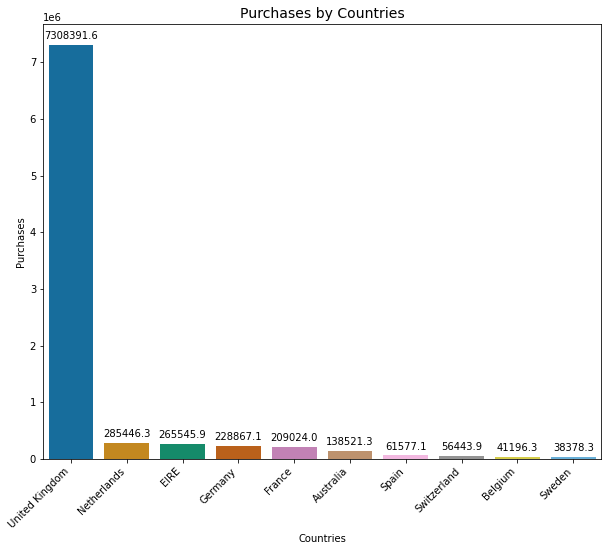

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Grouped barplot
ax = sns.barplot(x='Country', y='ProductTotal', data=plot1,
                 palette='colorblind', estimator=max)

# Adding Annotation to Barplots
for x in ax.patches:
  ax.annotate(format(x.get_height(), '.1f'),
                    (x.get_x() + x.get_width() / 2., x.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Set the axes
ax.set_ylabel('Purchases')
ax.set_xlabel('Countries')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the title
ax.set_title('Purchases by Countries', size=14)

# Show the graph
plt.show()

### Purchases per Year

In [ ]:
dataset['Year'] = dataset['InvoiceDate'].dt.strftime('%Y')
# pd.DatetimeIndex(dataset['InvoiceDate']).year

dataset['Year'].unique()

array(['2010', '2011'], dtype=object)

In [ ]:
plot2 = dataset.groupby('Year').sum().sort_values(by='ProductTotal', ascending=False).head(10).reset_index()
plot2

,Year,Quantity,UnitPrice,CustomerID,ProductTotal
0,2011,4869416,1158065.004,5.679734e+09,8338694.014
1,2010,312280,81935.610,4.062410e+08,572713.890


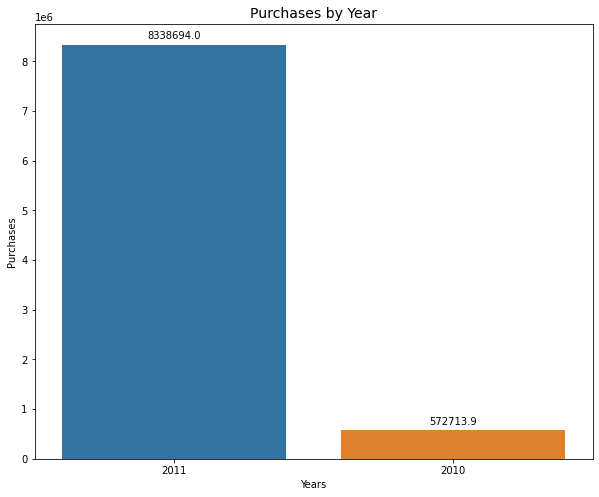

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Grouped barplot
ax=sns.barplot(x='Year', y='ProductTotal', data=plot2)

# Adding Annotation to Barplots
for x in ax.patches:
  ax.annotate(format(x.get_height(), '.1f'),
                    (x.get_x() + x.get_width() / 2., x.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Set the axes
ax.set_ylabel('Purchases')
ax.set_xlabel('Years')

# Set the title
ax.set_title('Purchases by Year', size=14)

# Show the plot
plt.show()

### Most Popular Products (General)

In [ ]:
plot3 = dataset.groupby('Description').sum().sort_values(by='Quantity', ascending=False).head(10).reset_index()
plot3

,Description,Quantity,UnitPrice,CustomerID,ProductTotal
0,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,168469.60
1,MEDIUM CERAMIC TOP STORAGE JAR,77916,241.62,3047321.0,81416.73
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415,138.40,7226036.0,13586.25
3,JUMBO BAG RED RETROSPOT,46181,3261.69,24748363.0,85220.78
4,WHITE HANGING HEART T-LIGHT HOLDER,36725,5867.22,31562068.0,100448.15
5,ASSORTED COLOUR BIRD ORNAMENT,35362,2366.56,21450268.0,56580.34
6,PACK OF 72 RETROSPOT CAKE CASES,33693,585.49,16135698.0,16394.53
7,POPCORN HOLDER,30931,554.03,10122639.0,23427.71
8,RABBIT NIGHT LIGHT,27202,1695.74,12564016.0,51346.20
9,MINI PAINT SET VINTAGE,26076,213.37,4780324.0,16039.24


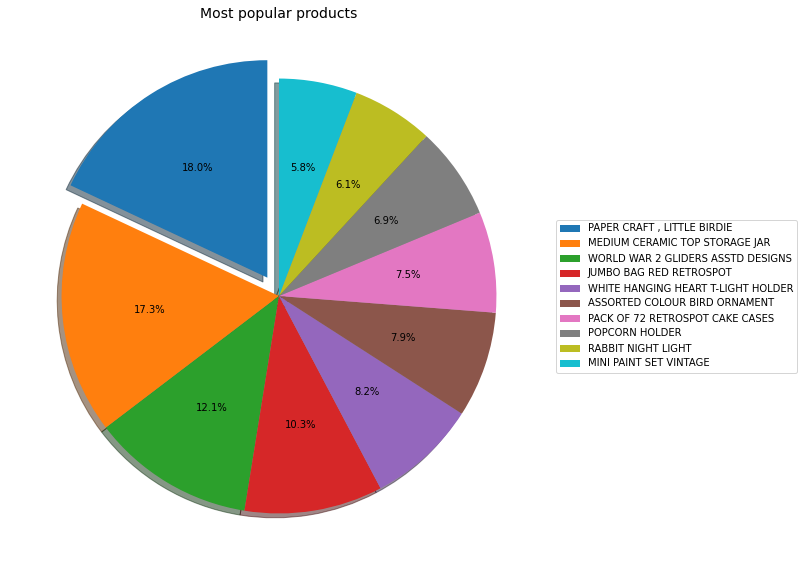

In [ ]:
# Set the sizes
plt.figure(figsize = (10, 10))

# Explode the slices
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Set the label
labels = plot3['Description']

# Grouped piechat
plt.pie(plot3['Quantity'], explode=explode, autopct='%1.1f%%', startangle=90, shadow=True, )
plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Set the title
plt.title('Most popular products', size=14)

# Show the graph
plt.show()

### Least Popular Products (General)

In [ ]:
plot4 = dataset.groupby('Description').sum().sort_values(by=['Quantity', 'ProductTotal'], ascending=True).head(10).reset_index()
plot4

,Description,Quantity,UnitPrice,CustomerID,ProductTotal
0,HEN HOUSE W CHICK IN NEST,1,0.42,17841.0,0.42
1,SET 12 COLOURING PENCILS DOILEY,1,0.65,14646.0,0.65
2,PINK CRYSTAL GUITAR PHONE CHARM,1,0.85,14701.0,0.85
3,PURPLE FRANGIPANI HAIRCLIP,1,0.85,17961.0,0.85
4,BLACKCHRISTMAS TREE 30CM,1,1.25,15048.0,1.25
5,BLUE LEAVES AND BEADS PHONE CHARM,1,1.25,17198.0,1.25
6,DUSTY PINK CHRISTMAS TREE 30CM,1,1.25,15048.0,1.25
7,FUNKY MONKEY MUG,1,1.25,14606.0,1.25
8,ORANGE FELT VASE + FLOWERS,1,1.25,17841.0,1.25
9,PACK 4 FLOWER/BUTTERFLY PATCHES,1,1.25,12748.0,1.25


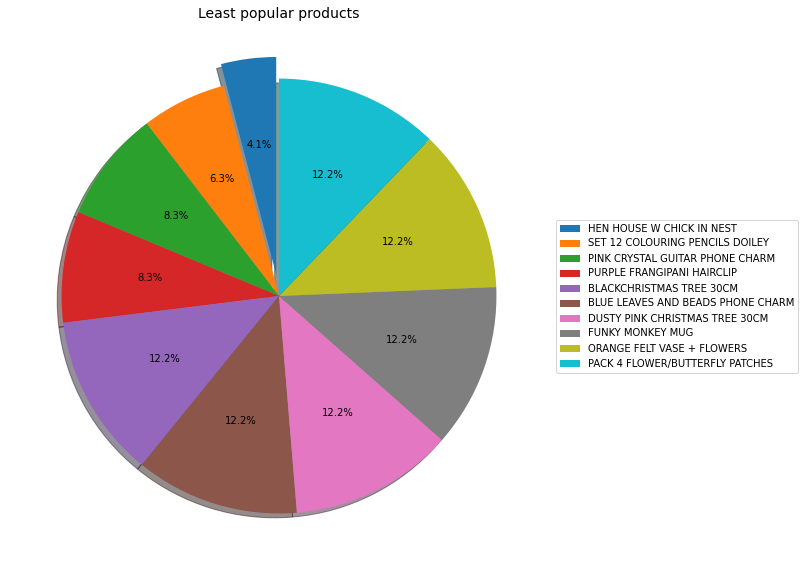

In [ ]:
# Set the sizes
plt.figure(figsize = (10, 10))

# Explode the slices
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Set the label
labels = plot4['Description']

# Grouped piechat
plt.pie(plot4['ProductTotal'], explode=explode, autopct='%1.1f%%', startangle=90, shadow=True, )
plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

#Set a title
plt.title('Least popular products', size=14)

# Show the plot
plt.show()

### Popular Products (UK)

In [ ]:
uk_purchases = dataset[dataset['Country']=='United Kingdom']
uk_purchases.describe()

,Quantity,UnitPrice,CustomerID,ProductTotal
count,354345.000000,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219,20.625073
std,190.428127,17.862067,1594.546025,326.033014
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,14194.000000,4.160000
50%,4.000000,1.950000,15522.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
uk_product = uk_purchases.groupby('Description',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)
uk_product

,Description,Quantity
2289,"PAPER CRAFT , LITTLE BIRDIE",80995
1964,MEDIUM CERAMIC TOP STORAGE JAR,76919
3742,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49182
1736,JUMBO BAG RED RETROSPOT,41981
3655,WHITE HANGING HEART T-LIGHT HOLDER,34648
204,ASSORTED COLOUR BIRD ORNAMENT,32727
2562,POPCORN HOLDER,28935
2205,PACK OF 12 LONDON TISSUES,24337
525,BROCADE RING PURSE,22711
2239,PACK OF 72 RETROSPOT CAKE CASES,22465


In [ ]:
uk_purchases.groupby(['Description','StockCode'],as_index= False)['Quantity'].count().sort_values(by='Quantity', ascending=False).head(10)

,Description,StockCode,Quantity
3683,WHITE HANGING HEART T-LIGHT HOLDER,85123A,1940
1747,JUMBO BAG RED RETROSPOT,85099B,1464
2748,REGENCY CAKESTAND 3 TIER,22423,1426
204,ASSORTED COLOUR BIRD ORNAMENT,84879,1333
2328,PARTY BUNTING,47566,1308
1927,LUNCH BAG RED RETROSPOT,20725,1147
1919,LUNCH BAG BLACK SKULL.,20727,1049
2983,SET OF 3 CAKE TINS PANTRY DESIGN,22720,1020
2296,PAPER CHAIN KIT 50'S CHRISTMAS,22086,982
1594,HEART OF WICKER SMALL,22469,952


from the plot below where the hour of transaction is plotted against mean of quantity, price and totalproduct of the transaction from the whole dataset, we found that maximum transaction occured in the morning time upto 9 am and then decreased and again rise abit at 3 to 4 pm.

<Figure size 864x576 with 0 Axes>

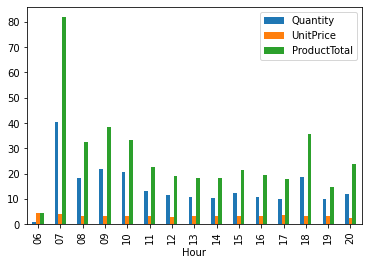

In [ ]:
dataset['Hour'] = dataset['InvoiceDate'].dt.strftime('%H')
x = dataset.groupby('Hour')[['Quantity', 'UnitPrice','ProductTotal']].mean()
plt.figure(figsize = (12,8))
x.plot(kind = 'bar')
plt.show()

From the plot below of transaction trend in different months, we observed that maximum transaction occur in month august and september but the total product of january is highest so we can say people buy expensive items more in the month of january. it maybe because of start of new year.

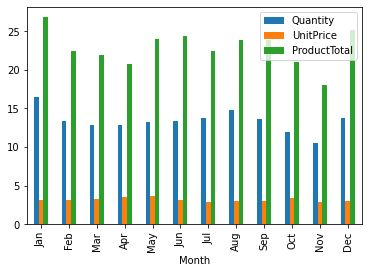

In [ ]:
dataset['Month'] = dataset['InvoiceDate'].dt.strftime('%h')
x = dataset.groupby('Month')[['Quantity', 'UnitPrice', 'ProductTotal']].mean()
set_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x.index = pd.CategoricalIndex(x.index, categories = set_order, ordered = True)
x= x.sort_index()
x.plot(kind = 'bar')

## 3.Data processing


> Prepare the data for the Association Rules implementation

In [ ]:
dataset.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ProductTotal,Year,Hour,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,08,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,08,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,08,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,08,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,08,Dec


#### Per invoice, place each item in an unique array

In [ ]:
# Per invoice, place each item(code,description) in an unique array
dataset_invoice={"invoice":[],"Items_code":[],"Items_description":[]}
count=0
shap=dataset.shape[0]
for invoice in set(dataset.Invoice):
  dataset_invoice["invoice"].append(invoice)
  array1=[]
  for product in dataset.loc[dataset.Invoice==invoice].StockCode:
    array1.append(str(product))
  dataset_invoice["Items_code"].append(array1)
  array2=[]
  for description in dataset.loc[dataset.Invoice==invoice].Description:
    array2.append(description.replace(" ","_"))
  dataset_invoice["Items_description"].append(array2)

dataset_invoice=pd.DataFrame(dataset_invoice)
dataset_invoice


AttributeError: ignored

In [ ]:
drive.mount('/content/drive/',force_remount=True)
dataset_invoice.to_csv('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/Project/retail_grouped_by_invoice.csv',index=False)




Mounted at /content/drive/


In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
from ast import literal_eval
drive.mount('/content/drive/',force_remount=True)
dataset_invoice2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/Project/retail_grouped_by_invoice.csv',converters={"Items_code": literal_eval,"Items_description":literal_eval})
dataset_invoice2

Mounted at /content/drive/


,invoice,Items_code,Items_description
0,524288,"[21906, 22612]","[PHARMACIE_FIRST_AID_TIN, TEA_COSY_VINTAGE_UNI..."
1,524289,"[22380, 22664, 22381, 22379, 22622, 22623, 223...","[TOY_TIDY_SPACEBOY, TOY_TIDY_DOLLY_GIRL_DESIGN..."
2,524290,"[22488, 22185, 22457, 20752, 22139, 22470, 218...","[NATURAL_SLATE_RECTANGLE_CHALKBOARD, SLATE_TIL..."
3,524291,"[20712, 84078A, 75049L, 21867, 15056N, 72760B,...","[JUMBO_BAG_WOODLAND_ANIMALS, SET/4_WHITE_RETRO..."
4,524292,"[22667, 22665, 22084, 21478, 22461, 84406B, 85...","[RECIPE_BOX_RETROSPOT, RECIPE_BOX_BLUE_SKETCHB..."
...,...,...,...
19210,534056,"[22620, 22619, 21790, 21791, 21891]","[4_TRADITIONAL_SPINNING_TOPS, SET_OF_6_SOLDIER..."
19211,491516,"[22044, 85069]","[CHRISTMAS_CARD_STACK_OF_PRESENTS, CREAM_SWEET..."
19212,524285,"[22867, 22449, 22743, 22570, 22569, 84270, 224...","[HAND_WARMER_BIRD_DESIGN, SILK_PURSE_BABUSHKA_..."
19213,524286,"[22752, 21564, 47420, 72351A, 72351B, 72349B, ...","[SET_7_BABUSHKA_NESTING_BOXES, PINK__HEART_SHA..."


In [ ]:
dataset_invoice2.shape[0]

19215

## 4.Market basket analysis

### Building association rules

### APRIORI Algorithm

In [ ]:
def item_set_gen(ItemList,k):
  """
  Return item's conbinations of k dimensions from a list of items given. That list can be a list of single elements or a list of lists, or tuples

  """
  # Import library to make conbinations
  from itertools import combinations
  # Set a new list to store items
  New_item_list=[]

  for i in ItemList:
    #Validate whether item is a list,instance or a single value
    if isinstance(i,list) ^ isinstance(i,tuple):
      # If it is a list or a tuple, store each element in the temporary array
      for j in i:
        if j not in New_item_list:
          New_item_list.append(j)
    else:
      #Storage the item which is not a list or tuple
      if i not in New_item_list:
        New_item_list.append(i)

  if k==1:
    res=New_item_list
  else:
    # generate conbinations using itertools.combinations library
    res=combinations(set(New_item_list),k)

  return res


In [ ]:
def APRIORI(df,SupportRatio=.015,column=1):
  df_apriori=df#.iloc[0:900,:]
  df_w=df_apriori.iloc[:,column]
  min_sup=(df_w.shape[0]*SupportRatio)#//100
  result={}
  print("MIN SUPPORT",min_sup)

  # get item's list
  item_list=[]
  for lis in df_w:
    for item in lis:
      if item not in item_list:
        item_list.append(item)

  print("length item list",len(item_list))
  # get each items's support

  item_count=[]
  for item in item_list:
    count=0
    for i in df_w:
      if item in i:
        count+=1
    item_count.append(count)

  df1=pd.DataFrame({"Item":item_list,"sup":item_count}).sort_values(by="sup",ascending=False)
  df2=df1.drop(df1.loc[df1.sup<min_sup].index).reset_index(drop=True)
  result[1]=df2
  k=2
  display("df2 previous while",df2)
  if df2.iloc[0,1]<min_sup:
    return result
  while True:
    # get item_set
    display(df2.Item,k)
    item_set=item_set_gen(df2.Item,k)

    item_count=[]
    item_set_new=[]

    for item in item_set:
     count=0
     for purchase in df_w:
       test1=True
       for item_part in item:
         test=item_part in purchase
         test1=test1*test
       if test1:
          count+=1
     if count>=min_sup:
       item_count.append(count)
       item_set_new.append(item)
    df1=pd.DataFrame({"Item":item_set_new,"sup":item_count})#.sort_values(by="sup",ascending=False)
    df1=df1.sort_values(by="sup",ascending=False)
    df2=df1.drop(df1.loc[df1.sup<min_sup].index).reset_index(drop=True)
    result[k]=df2
    k+=1
    try:
      if df2.iloc[0,1]<=min_sup:
        break
    except:
      break

  return result

### FP-growth Algorithm

In [ ]:
def fp_growth(df,SupportRatio=.015,column=1):
  df_w=df#.iloc[0:600,:]
  min_sup=(df_w.shape[0]*SupportRatio)#//100
  print("min_support: ",min_sup)
  list_purchases=df_w.iloc[:,column]
  items_list=item_set_gen(list_purchases,1)
  #count each item ocurrence

  item_count=[]
  for item in items_list:
    count=0
    for i in list_purchases:
      if item in i:
        count+=1
    item_count.append(count)

  df1=pd.DataFrame({"Item":items_list,"sup":item_count}).sort_values(by="sup",ascending=False)
  df2=df1.drop(df1.loc[df1.sup<min_sup].index).reset_index(drop=True)

 #
  purchase_ordered=[]

  for purchase in list_purchases:

    tem_tf=[]
    for item_bought in purchase:
      if item_bought in df2.Item.values:
        ind=df2.loc[df2.Item==item_bought].index
        tem_tf.append([df2.iloc[ind,0].values[0],df2.iloc[ind,1].values[0]])
    df3=pd.DataFrame(tem_tf,columns=['Item','sup']).sort_values(by='sup',ascending=False)

  #######
    order_pur=[] #Ordered_purchase
    for item in df3.Item:
      if item in purchase:
        order_pur.append(item)
    if order_pur==[]:
      order_pur=np.NaN
    purchase_ordered.append(order_pur)


  df_w_2=pd.DataFrame({'Invoice':df_w.iloc[:,0],"Items_code_original":list_purchases,"Items_code_ordered":purchase_ordered})

  sorted=df_w_2.drop(df_w_2.loc[df_w_2.Items_code_ordered.isnull()].index)
  sorted.reset_index(drop=True,inplace=True)
#############################################################
  set_path=[]

  for n in df2.Item.values[1:]:
    group=[]
    dictp={}
    for item in sorted.Items_code_ordered:
      if n in item:
        ind=item.index(n)
        temp=item[0:ind]
        if ind!=0:
          if temp in group:
            dictp[" ".join(temp)]+=1
          else:
            group.append(temp)
            dictp[" ".join(temp)]=1
    h=[]
    for data in dictp:
      v=list(data.split())
      v.append(dictp[data])
      h.append(v)

    set_path.append(h)
  result=pd.DataFrame({"Items":df2.Item.values[1:],"Pattern_base":set_path})
  result.sort_index(ascending=False,inplace=True)
####


  frequent_pattern_generated=[]
  conditional_fp_tree=[]

  for pattern_base in result.Pattern_base:
    dict_count={}
    for pattern in pattern_base:



      for element in pattern[:-1]:
        dict_count[element]=dict_count.get(element,0)+pattern[-1]


      h=[]
      for data in dict_count:
        v=list(data.split()) #split the strings elements in the dictionary's key
        v.append(dict_count[data]) # include the count
        h.append(v)


    conditional_fp_tree.append(h)
    frequent_pattern_generated.append(h)
  result['Conditional_fp_tree']=conditional_fp_tree


  result.reset_index(drop=True,inplace=True)

  print(df3.Item)

########################

  Frequent_pattern=[]
  res.reset_index(drop=True,inplace=True)
  for indx in result.index:
    list_of_items=[]
    list2=[]
    final=[]
    dict_pr={}
    for element_count in result.iloc[indx,list(result.keys()).index('Conditional_fp_tree')]:
      if element_count[1] >= min_sup:
        list_of_items.append(element_count[0])
        final.append([element_count[0],result.iloc[indx,list(result.keys()).index('Items')],element_count[1]])

    for n in range(2,len(list_of_items)+1):
      x=list(item_set_gen(list_of_items,n))
      for v in x:

      ## sort tuple
        ordered_list2=[]
        for item in df2.Item.values[1:]:
            if item in v:
              ordered_list2.append(item)

        if ordered_list2!=[]:
          list2.append(ordered_list2)

    dict_pr={}

    for pattern in result.iloc[indx,list(result.keys()).index('Pattern_base')]:
      test1=True
      for element in list2:
        el2=element.copy()
        for item in element:
          test=item in pattern
          test1=test1*test
        if test1:
          el2.append(result.iloc[indx,list(result.keys()).index('Items')])
          dict_pr[" ".join(el2)]=dict_pr.get(" ".join(el2),0)+pattern[-1]

    h=[]
    for data in dict_pr:
      if dict_pr[data]>=min_sup:
        v=list(data.split()) #split the strings elements in the dictionary's key
        v.append(dict_pr[data]) # include the count
        h.append(v)

    for value in h:
      final.append(value)
    Frequent_pattern.append(final)

  result['Frequent_pattern_generated']=Frequent_pattern

  support=[]
  fp=[]
  for n in result['Frequent_pattern_generated']:
    for element in n:
      fp.append(element[:-1])
      support.append(element[-1])

  ItemSets=pd.DataFrame({"Support":support,"Itemset":fp})




  return result,ItemSets,df2,df_w_2



## 5.Extract the frequent item set

In [ ]:
p=fp_growth(dataset_invoice2,SupportRatio=0.015,column=1)

min_support:  288.22499999999997


KeyboardInterrupt: ignored

In [ ]:
fp_growth_tree=p[0]
frequent_itemset=p[1]
items_count=p[2]
print("   FP_GROWTH_TREE  ")
display(fp_growth_tree)
print("   FREQUENT_ITEMSET  ")
display(frequent_itemset)




In [ ]:
x=APRIORI(dataset_invoice2)

In [ ]:
for df in x:
  print(f'Itemset K-{df}')
  display(x[df])

In [ ]:
drive.mount('/content/drive/',force_remount=True)
for df in x:
  x[df].to_csv(f'/content/drive/My Drive/Colab Notebooks/Data_Mining_Course/Project/Itemset_{df}.csv','w')


## 6.Extract the association rules

here we will be using the mlxtend library for extracting the association rules

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt


In [ ]:
dataset.Country.unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland'],
      dtype=object)

here we have transaction record for different countries. for now we will deal with UK transaction having more transaction records in the dataset.

In [ ]:
# Transactions done in the United Kingdom
basket_UK = (dataset[dataset['Country'] =="United Kingdom"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [ ]:

basket_UK.head()

Description,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket_UK.shape

(17614, 4377)

here in the dataset we have more than 4000 dataitems to deal with . so if we consider all of them our result will look messy. so for now we will only take a look at 50 items.

In [ ]:
d = basket_UK.columns
print(d[:50])

Index(['10 COLOUR SPACEBOY PEN', '11 PC CERAMIC TEA SET POLKADOT',
       '12 ASS ZINC CHRISTMAS DECORATIONS', '12 COLOURED PARTY BALLOONS',
       '12 DAISY PEGS IN WOOD BOX', '12 EGG HOUSE PAINTED WOOD',
       '12 IVORY ROSE PEG PLACE SETTINGS', '12 MESSAGE CARDS WITH ENVELOPES',
       '12 MINI TOADSTOOL PEGS', '12 PENCIL SMALL TUBE WOODLAND',
       '12 PENCILS SMALL TUBE POSY', '12 PENCILS SMALL TUBE RED RETROSPOT',
       '12 PENCILS SMALL TUBE RED SPOTTY', '12 PENCILS SMALL TUBE SKULL',
       '12 PENCILS TALL TUBE POSY', '12 PENCILS TALL TUBE RED RETROSPOT',
       '12 PENCILS TALL TUBE RED SPOTTY', '12 PENCILS TALL TUBE SKULLS',
       '12 PENCILS TALL TUBE WOODLAND', '12 PINK HEN+CHICKS IN BASKET',
       '12 PINK ROSE PEG PLACE SETTINGS', '12 RED ROSE PEG PLACE SETTINGS',
       '15 PINK FLUFFY CHICKS IN BOX', '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
       '2 DAISIES HAIR COMB', '2 PICTURE BOOK EGGS EASTER BUNNY',
       '2 PICTURE BOOK EGGS EASTER CHICKS', '2 PICTURE BOOK E

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy
# so let's reduce the items from 121 to 50

basket_UK = basket_UK.loc[:, ['10 COLOUR SPACEBOY PEN', '11 PC CERAMIC TEA SET POLKADOT',
       '12 ASS ZINC CHRISTMAS DECORATIONS', '12 COLOURED PARTY BALLOONS',
       '12 DAISY PEGS IN WOOD BOX', '12 EGG HOUSE PAINTED WOOD',
       '12 IVORY ROSE PEG PLACE SETTINGS', '12 MESSAGE CARDS WITH ENVELOPES',
       '12 MINI TOADSTOOL PEGS', '12 PENCIL SMALL TUBE WOODLAND',
       '12 PENCILS SMALL TUBE POSY', '12 PENCILS SMALL TUBE RED RETROSPOT',
       '12 PENCILS SMALL TUBE RED SPOTTY', '12 PENCILS SMALL TUBE SKULL',
       '12 PENCILS TALL TUBE POSY', '12 PENCILS TALL TUBE RED RETROSPOT',
       '12 PENCILS TALL TUBE RED SPOTTY', '12 PENCILS TALL TUBE SKULLS',
       '12 PENCILS TALL TUBE WOODLAND', '12 PINK HEN+CHICKS IN BASKET',
       '12 PINK ROSE PEG PLACE SETTINGS', '12 RED ROSE PEG PLACE SETTINGS',
       '15 PINK FLUFFY CHICKS IN BOX', '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
       '2 DAISIES HAIR COMB', '2 PICTURE BOOK EGGS EASTER BUNNY',
       '2 PICTURE BOOK EGGS EASTER CHICKS', '2 PICTURE BOOK EGGS EASTER DUCKS',
       '20 DOLLY PEGS RETROSPOT', '200 BENDY SKULL STRAWS',
       '200 RED + WHITE BENDY STRAWS', '24 HANGING EASTER EGGS FLORAL TUB',
       '3 BIRDS CANVAS SCREEN', '3 BLACK CATS W HEARTS BLANK CARD',
       '3 GARDENIA MORRIS BOXED CANDLES', '3 HEARTS HANGING DECORATION RUSTIC',
       '3 HOOK HANGER MAGIC GARDEN', '3 HOOK PHOTO SHELF ANTIQUE WHITE',
       '3 PIECE JIGSAW TOADSTOOLS', '3 PIECE SPACEBOY COOKIE CUTTER SET',
       '3 PINK HEN+CHICKS IN BASKET', '3 ROSE MORRIS BOXED CANDLES',
       '3 STRIPEY MICE FELTCRAFT', '3 TIER CAKE TIN GREEN AND CREAM',
       '3 TIER CAKE TIN RED AND CREAM', '3 TIER SWEETHEART GARDEN SHELF',
       '3 TRADITIONAL COOKIE CUTTERS  SET',
       '3 TRADITIONAl BISCUIT CUTTERS  SET',
       '3 WHITE CHOC MORRIS BOXED CANDLES', '3 WICK CHRISTMAS BRIAR CANDLE']]

# checking the shape
basket_UK.shape

(17614, 50)

In [ ]:
basket_UK.head()

Description,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,...,3 PINK HEN+CHICKS IN BASKET,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAL COOKIE CUTTERS SET,3 TRADITIONAl BISCUIT CUTTERS SET,3 WHITE CHOC MORRIS BOXED CANDLES,3 WICK CHRISTMAS BRIAR CANDLE
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


now we are defining hot encoding function in order to make the data suitable for the model.

In [ ]:
def hot_encode(x):
    if(x <= 0):
        return 0
    if(x >= 1):
        return 1

In [ ]:
basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded
basket_UK

Description,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,...,3 PINK HEN+CHICKS IN BASKET,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAL COOKIE CUTTERS SET,3 TRADITIONAl BISCUIT CUTTERS SET,3 WHITE CHOC MORRIS BOXED CANDLES,3 WICK CHRISTMAS BRIAR CANDLE
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


here we have choosed minimun support to be 0.5% only beacause this is large dataset and there are many items.so setting the minimum support higher will give us null value.

In [ ]:
# Building the model
frq_items = apriori(basket_UK, min_support = 0.005, use_colnames = True)

frq_items

,support,itemsets
0,0.012206,(10 COLOUR SPACEBOY PEN)
1,0.005961,(12 COLOURED PARTY BALLOONS)
2,0.006586,(12 DAISY PEGS IN WOOD BOX)
3,0.007324,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.009311,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.012263,(12 PENCIL SMALL TUBE WOODLAND)
6,0.009481,(12 PENCILS SMALL TUBE RED RETROSPOT)
7,0.015726,(12 PENCILS SMALL TUBE RED SPOTTY)
8,0.022652,(12 PENCILS SMALL TUBE SKULL)
9,0.006018,(12 PENCILS TALL TUBE RED RETROSPOT)


In [ ]:
itd = frq_items
itd['length'] = itd['itemsets'].apply(lambda x: len(x))
itd

,support,itemsets,length
0,0.012206,(10 COLOUR SPACEBOY PEN),1
1,0.005961,(12 COLOURED PARTY BALLOONS),1
2,0.006586,(12 DAISY PEGS IN WOOD BOX),1
3,0.007324,(12 IVORY ROSE PEG PLACE SETTINGS),1
4,0.009311,(12 MESSAGE CARDS WITH ENVELOPES),1
5,0.012263,(12 PENCIL SMALL TUBE WOODLAND),1
6,0.009481,(12 PENCILS SMALL TUBE RED RETROSPOT),1
7,0.015726,(12 PENCILS SMALL TUBE RED SPOTTY),1
8,0.022652,(12 PENCILS SMALL TUBE SKULL),1
9,0.006018,(12 PENCILS TALL TUBE RED RETROSPOT),1


#7.Threshold and the final association extraction

from below association rule we can say that pencil tube retrospot and pencil tube skull has strong association with support 0.6% and confidence 67%. we can inferr that these items are study materials for children and parents tends to buy an extra option like having small size pencil bag along with the large packet.

In [ ]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCILS SMALL TUBE SKULL),0.009481,0.022652,0.006359,0.670659,29.606471,0.006144,2.967583
0,(12 PENCIL SMALL TUBE WOODLAND),(12 PENCILS SMALL TUBE SKULL),0.012263,0.022652,0.006813,0.555556,24.525202,0.006535,2.199032
7,(12 PENCILS TALL TUBE RED SPOTTY),(12 PENCILS TALL TUBE SKULLS),0.010219,0.015499,0.005450,0.533333,34.410745,0.005292,2.109645
5,(12 PENCILS SMALL TUBE RED SPOTTY),(12 PENCILS SMALL TUBE SKULL),0.015726,0.022652,0.008005,0.509025,22.471106,0.007649,1.990627
9,(12 PENCILS TALL TUBE WOODLAND),(12 PENCILS TALL TUBE SKULLS),0.010900,0.015499,0.005053,0.463542,29.907776,0.004884,1.835186
4,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED SPOTTY),0.022652,0.015726,0.008005,0.353383,22.471106,0.007649,1.522191
6,(12 PENCILS TALL TUBE SKULLS),(12 PENCILS TALL TUBE RED SPOTTY),0.015499,0.010219,0.005450,0.351648,34.410745,0.005292,1.526611
8,(12 PENCILS TALL TUBE SKULLS),(12 PENCILS TALL TUBE WOODLAND),0.015499,0.010900,0.005053,0.326007,29.907776,0.004884,1.467523
1,(12 PENCILS SMALL TUBE SKULL),(12 PENCIL SMALL TUBE WOODLAND),0.022652,0.012263,0.006813,0.300752,24.525202,0.006535,1.412570
2,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.022652,0.009481,0.006359,0.280702,29.606471,0.006144,1.377063


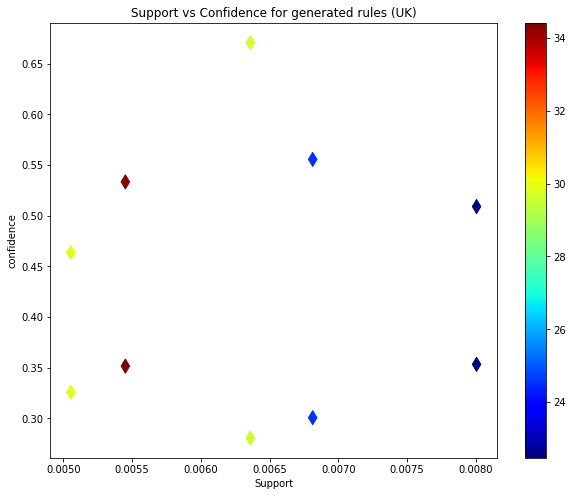

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter('support', 'confidence',c = 'lift',s = 100,marker = 'd', cmap="jet",data = rules)

plt.title("Support vs Confidence for generated rules (UK)")
#plt.legend(["Orange Drinks", "Cereal Bars"])
plt.xlabel("Support")
plt.ylabel("confidence")

plt.colorbar()
plt.show()
plt.style.use('seaborn')

In [ ]:
sorted_rules = rules.sort_values("lift", ascending=False)
rules.sort_values("lift", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(12 PENCILS TALL TUBE RED SPOTTY),(12 PENCILS TALL TUBE SKULLS),0.010219,0.015499,0.005450,0.533333,34.410745,0.005292,2.109645
6,(12 PENCILS TALL TUBE SKULLS),(12 PENCILS TALL TUBE RED SPOTTY),0.015499,0.010219,0.005450,0.351648,34.410745,0.005292,1.526611
9,(12 PENCILS TALL TUBE WOODLAND),(12 PENCILS TALL TUBE SKULLS),0.010900,0.015499,0.005053,0.463542,29.907776,0.004884,1.835186
8,(12 PENCILS TALL TUBE SKULLS),(12 PENCILS TALL TUBE WOODLAND),0.015499,0.010900,0.005053,0.326007,29.907776,0.004884,1.467523
2,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.022652,0.009481,0.006359,0.280702,29.606471,0.006144,1.377063
3,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCILS SMALL TUBE SKULL),0.009481,0.022652,0.006359,0.670659,29.606471,0.006144,2.967583
0,(12 PENCIL SMALL TUBE WOODLAND),(12 PENCILS SMALL TUBE SKULL),0.012263,0.022652,0.006813,0.555556,24.525202,0.006535,2.199032
1,(12 PENCILS SMALL TUBE SKULL),(12 PENCIL SMALL TUBE WOODLAND),0.022652,0.012263,0.006813,0.300752,24.525202,0.006535,1.412570
5,(12 PENCILS SMALL TUBE RED SPOTTY),(12 PENCILS SMALL TUBE SKULL),0.015726,0.022652,0.008005,0.509025,22.471106,0.007649,1.990627
4,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED SPOTTY),0.022652,0.015726,0.008005,0.353383,22.471106,0.007649,1.522191


In [ ]:
# recommendation of item
recommendation_list = []

for i, product in sorted_rules["antecedents"].items():

    for j in list(product):

        if j == ('12 PENCILS SMALL TUBE SKULL'):
            recommendation_list.append(list(sorted_rules.iloc[i]["consequents"]))

In [ ]:
print('recommended items with 12 PENCILS SMALL TUBE SKULL are:\n ',recommendation_list)


recommended items with 12 PENCILS SMALL TUBE SKULL are:
  [['36 PENCILS TUBE RED SPOTTY', '36 PENCILS TUBE WOODLAND', '12 PENCILS TALL TUBE WOODLAND']]


#Lets check the rules for country France similar as above

In [ ]:
# Transactions done in the France
basket_France = (dataset[dataset['Country'] =="France"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [ ]:
basket_France.head()

Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP WINTER FOREST,"WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
489883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
d = basket_France.columns
print(d[:50])

Index(['10 COLOUR SPACEBOY PEN', '12 IVORY ROSE PEG PLACE SETTINGS',
       '12 MESSAGE CARDS WITH ENVELOPES', '12 PENCIL SMALL TUBE WOODLAND',
       '12 PENCILS SMALL TUBE POSY', '12 PENCILS SMALL TUBE RED RETROSPOT',
       '12 PENCILS SMALL TUBE RED SPOTTY', '12 PENCILS SMALL TUBE SKULL',
       '12 PENCILS TALL TUBE POSY', '12 PENCILS TALL TUBE RED RETROSPOT',
       '12 PENCILS TALL TUBE RED SPOTTY', '12 PENCILS TALL TUBE SKULLS',
       '12 PENCILS TALL TUBE WOODLAND', '12 RED ROSE PEG PLACE SETTINGS',
       '2 DAISIES HAIR COMB', '20 DOLLY PEGS RETROSPOT',
       '200 RED + WHITE BENDY STRAWS', '3 HEARTS HANGING DECORATION RUSTIC',
       '3 HOOK HANGER MAGIC GARDEN', '3 PIECE SPACEBOY COOKIE CUTTER SET',
       '3 TRADITIONAl BISCUIT CUTTERS  SET', '36 DOILIES DOLLY GIRL',
       '36 DOILIES VINTAGE CHRISTMAS', '36 FOIL HEART CAKE CASES',
       '36 FOIL STAR CAKE CASES', '36 PENCILS TUBE RED SPOTTY',
       '36 PENCILS TUBE SKULLS', '36 PENCILS TUBE WOODLAND',
       '3D HEA

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy
# so let's reduce the items from 121 to 50

basket_France = basket_France.loc[:, ['10 COLOUR SPACEBOY PEN', '12 IVORY ROSE PEG PLACE SETTINGS',
       '12 MESSAGE CARDS WITH ENVELOPES', '12 PENCIL SMALL TUBE WOODLAND',
       '12 PENCILS SMALL TUBE POSY', '12 PENCILS SMALL TUBE RED RETROSPOT',
       '12 PENCILS SMALL TUBE RED SPOTTY', '12 PENCILS SMALL TUBE SKULL',
       '12 PENCILS TALL TUBE POSY', '12 PENCILS TALL TUBE RED RETROSPOT',
       '12 PENCILS TALL TUBE RED SPOTTY', '12 PENCILS TALL TUBE SKULLS',
       '12 PENCILS TALL TUBE WOODLAND', '12 RED ROSE PEG PLACE SETTINGS',
       '2 DAISIES HAIR COMB', '20 DOLLY PEGS RETROSPOT',
       '200 RED + WHITE BENDY STRAWS', '3 HEARTS HANGING DECORATION RUSTIC',
       '3 HOOK HANGER MAGIC GARDEN', '3 PIECE SPACEBOY COOKIE CUTTER SET',
       '3 TRADITIONAl BISCUIT CUTTERS  SET', '36 DOILIES DOLLY GIRL',
       '36 DOILIES VINTAGE CHRISTMAS', '36 FOIL HEART CAKE CASES',
       '36 FOIL STAR CAKE CASES', '36 PENCILS TUBE RED SPOTTY',
       '36 PENCILS TUBE SKULLS', '36 PENCILS TUBE WOODLAND',
       '3D HEARTS  HONEYCOMB PAPER GARLAND', '3D SHEET OF CAT STICKERS',
       '3D SHEET OF DOG STICKERS', '3D TRADITIONAL CHRISTMAS STICKERS',
       '4 IVORY DINNER CANDLES GOLD FLOCK',
       '4 IVORY DINNER CANDLES SILVER FLOCK', '4 PINK FLOCK CHRISTMAS BALLS',
       '4 TRADITIONAL SPINNING TOPS', '5 HOOK HANGER MAGIC TOADSTOOL',
       '5 HOOK HANGER RED MAGIC TOADSTOOL', '50CM METAL STRING WITH  7 CLIPS',
       '6 CHOCOLATE LOVE HEART T-LIGHTS', '6 CROCHET STRAWBERRIES',
       '6 RIBBONS ELEGANT CHRISTMAS', '6 RIBBONS RUSTIC CHARM',
       '6 ROCKET BALLOONS', '60 CAKE CASES DOLLY GIRL DESIGN',
       '60 CAKE CASES VINTAGE CHRISTMAS', '60 TEATIME FAIRY CAKE CASES',
       '72 ROUND PINK DOILIES', '72 SWEETHEART FAIRY CAKE CASES',
       '75 GREEN FAIRY CAKE CASES']]

# checking the shape
basket_France.shape

(236, 50)

In [ ]:
basket_France.head()

Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,6 CROCHET STRAWBERRIES,6 RIBBONS ELEGANT CHRISTMAS,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 ROUND PINK DOILIES,72 SWEETHEART FAIRY CAKE CASES,75 GREEN FAIRY CAKE CASES
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded
basket_France

Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,6 CROCHET STRAWBERRIES,6 RIBBONS ELEGANT CHRISTMAS,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 ROUND PINK DOILIES,72 SWEETHEART FAIRY CAKE CASES,75 GREEN FAIRY CAKE CASES
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Building the model
frq_items = apriori(basket_France, min_support = 0.005, use_colnames = True)

frq_items

,support,itemsets
0,0.008475,(10 COLOUR SPACEBOY PEN)
1,0.008475,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.046610,(12 PENCIL SMALL TUBE WOODLAND)
3,0.012712,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.033898,(12 PENCILS SMALL TUBE RED SPOTTY)
5,0.033898,(12 PENCILS TALL TUBE RED SPOTTY)
6,0.008475,(12 PENCILS TALL TUBE SKULLS)
7,0.046610,(12 PENCILS TALL TUBE WOODLAND)
8,0.021186,(20 DOLLY PEGS RETROSPOT)
9,0.008475,(200 RED + WHITE BENDY STRAWS)


In [ ]:
itd = frq_items
itd['length'] = itd['itemsets'].apply(lambda x: len(x))
itd

,support,itemsets,length
0,0.008475,(10 COLOUR SPACEBOY PEN),1
1,0.008475,(12 MESSAGE CARDS WITH ENVELOPES),1
2,0.046610,(12 PENCIL SMALL TUBE WOODLAND),1
3,0.012712,(12 PENCILS SMALL TUBE RED RETROSPOT),1
4,0.033898,(12 PENCILS SMALL TUBE RED SPOTTY),1
5,0.033898,(12 PENCILS TALL TUBE RED SPOTTY),1
6,0.008475,(12 PENCILS TALL TUBE SKULLS),1
7,0.046610,(12 PENCILS TALL TUBE WOODLAND),1
8,0.021186,(20 DOLLY PEGS RETROSPOT),1
9,0.008475,(200 RED + WHITE BENDY STRAWS),1


In [ ]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(4 IVORY DINNER CANDLES GOLD FLOCK),(4 IVORY DINNER CANDLES SILVER FLOCK),0.008475,0.008475,0.008475,1.0,118.000000,0.008403,inf
29,(4 IVORY DINNER CANDLES SILVER FLOCK),(4 IVORY DINNER CANDLES GOLD FLOCK),0.008475,0.008475,0.008475,1.0,118.000000,0.008403,inf
24,(36 DOILIES VINTAGE CHRISTMAS),(60 CAKE CASES VINTAGE CHRISTMAS),0.008475,0.012712,0.008475,1.0,78.666667,0.008367,inf
23,(36 DOILIES DOLLY GIRL),(60 CAKE CASES DOLLY GIRL DESIGN),0.008475,0.016949,0.008475,1.0,59.000000,0.008331,inf
80,"(12 PENCILS SMALL TUBE RED SPOTTY, 12 PENCILS ...","(36 PENCILS TUBE WOODLAND, 12 PENCILS TALL TUB...",0.008475,0.021186,0.008475,1.0,47.200000,0.008295,inf
82,"(12 PENCILS SMALL TUBE RED SPOTTY, 12 PENCILS ...","(36 PENCILS TUBE WOODLAND, 12 PENCILS TALL TUB...",0.008475,0.021186,0.008475,1.0,47.200000,0.008295,inf
97,"(12 PENCILS TALL TUBE WOODLAND, 36 PENCILS TUB...","(36 PENCILS TUBE WOODLAND, 12 PENCILS TALL TUB...",0.016949,0.021186,0.016949,1.0,47.200000,0.016590,inf
99,"(36 PENCILS TUBE RED SPOTTY, 12 PENCILS TALL T...","(36 PENCILS TUBE WOODLAND, 12 PENCILS TALL TUB...",0.016949,0.021186,0.016949,1.0,47.200000,0.016590,inf
34,"(12 PENCILS SMALL TUBE RED SPOTTY, 12 PENCILS ...",(12 PENCILS TALL TUBE RED SPOTTY),0.008475,0.033898,0.008475,1.0,29.500000,0.008187,inf
40,"(36 PENCILS TUBE WOODLAND, 12 PENCILS SMALL TU...",(12 PENCILS TALL TUBE RED SPOTTY),0.008475,0.033898,0.008475,1.0,29.500000,0.008187,inf


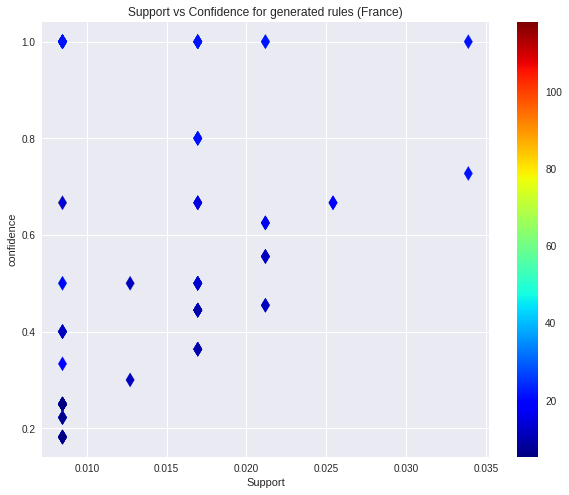

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter('support', 'confidence',c = 'lift',s = 100,marker = 'd', cmap="jet",data = rules)

plt.title("Support vs Confidence for generated rules (France)")
#plt.legend(["Orange Drinks", "Cereal Bars"])
plt.xlabel("Support")
plt.ylabel("confidence")

plt.colorbar()
plt.show()
plt.style.use('seaborn')

In [ ]:
sorted_rules = rules.sort_values("lift", ascending=False)
rules.sort_values("lift", ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(4 IVORY DINNER CANDLES GOLD FLOCK),(4 IVORY DINNER CANDLES SILVER FLOCK),0.008475,0.008475,0.008475,1.000000,118.000000,0.008403,inf
29,(4 IVORY DINNER CANDLES SILVER FLOCK),(4 IVORY DINNER CANDLES GOLD FLOCK),0.008475,0.008475,0.008475,1.000000,118.000000,0.008403,inf
24,(36 DOILIES VINTAGE CHRISTMAS),(60 CAKE CASES VINTAGE CHRISTMAS),0.008475,0.012712,0.008475,1.000000,78.666667,0.008367,inf
25,(60 CAKE CASES VINTAGE CHRISTMAS),(36 DOILIES VINTAGE CHRISTMAS),0.012712,0.008475,0.008475,0.666667,78.666667,0.008367,2.974576
23,(36 DOILIES DOLLY GIRL),(60 CAKE CASES DOLLY GIRL DESIGN),0.008475,0.016949,0.008475,1.000000,59.000000,0.008331,inf
22,(60 CAKE CASES DOLLY GIRL DESIGN),(36 DOILIES DOLLY GIRL),0.016949,0.008475,0.008475,0.500000,59.000000,0.008331,1.983051
94,"(36 PENCILS TUBE WOODLAND, 12 PENCILS TALL TUB...","(36 PENCILS TUBE RED SPOTTY, 12 PENCILS TALL T...",0.021186,0.016949,0.016949,0.800000,47.200000,0.016590,4.915254
85,"(36 PENCILS TUBE WOODLAND, 12 PENCILS TALL TUB...","(12 PENCILS SMALL TUBE RED SPOTTY, 12 PENCILS ...",0.021186,0.008475,0.008475,0.400000,47.200000,0.008295,1.652542
96,"(36 PENCILS TUBE WOODLAND, 12 PENCILS TALL TUB...","(12 PENCILS TALL TUBE WOODLAND, 36 PENCILS TUB...",0.021186,0.016949,0.016949,0.800000,47.200000,0.016590,4.915254
83,"(36 PENCILS TUBE WOODLAND, 12 PENCILS TALL TUB...","(12 PENCILS SMALL TUBE RED SPOTTY, 12 PENCILS ...",0.021186,0.008475,0.008475,0.400000,47.200000,0.008295,1.652542


In [ ]:
recommendation_list = []

for i, product in sorted_rules["antecedents"].items():

    for j in list(product):

        if j == ('36 DOILIES DOLLY GIRL'):
            recommendation_list.append(list(sorted_rules.iloc[i]["consequents"]))

In [ ]:
recommendation_list

[['36 PENCILS TUBE RED SPOTTY',
  '36 PENCILS TUBE WOODLAND',
  '12 PENCILS TALL TUBE WOODLAND']]